In [1]:
import pandas as pd
import numpy as np

train=pd.read_csv('train_features.csv')
train_labels=pd.read_csv('train_labels.csv')
test=pd.read_csv('test_features.csv')
submission=pd.read_csv('sample_submission.csv')

In [2]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [3]:
#id 별로 각각 600개의 데이터가 있음을 확인   
train['id'].value_counts()

2047    600
1347    600
2378    600
1354    600
2379    600
       ... 
1699    600
675     600
2722    600
1698    600
0       600
Name: id, Length: 3125, dtype: int64

In [4]:
#train_labels.csv 에서 id 가 수행한 동작과 그에 따른 label값을 확인
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


<AxesSubplot:>

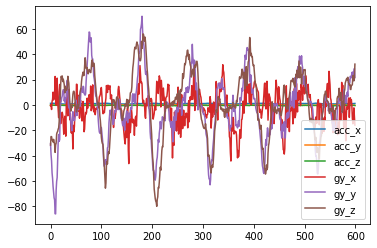

In [5]:
#id 별 동작들의 흐름 살펴보기
ex=train[train['id']==0]
ex.iloc[:,2:].plot()

<AxesSubplot:>

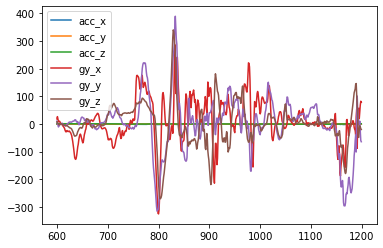

In [6]:
ex=train[train['id']==1]
ex.iloc[:,2:].plot()

<AxesSubplot:>

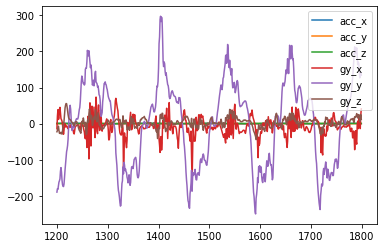

In [7]:
ex=train[train['id']==2]
ex.iloc[:,2:].plot()

<AxesSubplot:>

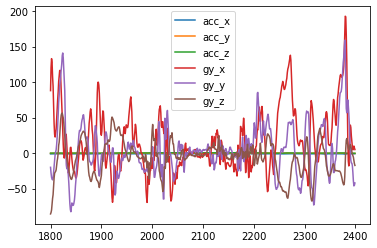

In [8]:
ex=train[train['id']==3]
ex.iloc[:,2:].plot()

In [9]:
#test'id'는 782개 
test['id'].nunique()

782

In [10]:
#782개의 id 별 동작 데이터를 활용해 각각의id가 어떤 동작인지를 분류하는 문제!!
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [12]:
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
X.shape

TensorShape([3125, 600, 6])

In [13]:
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

(3125, 61)

In [14]:
#가벼운 모델 생성
model = Sequential()
model.add(LSTM(32, input_shape=(600,6)))
model.add(Dense(128, activation='relu'))
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X,y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
20/20 [==============================] - 10s 368ms/step - loss: 3.9594 - accuracy: 0.1728 - val_loss: 3.3501 - val_accuracy: 0.4960
Epoch 2/30
20/20 [==============================] - 6s 294ms/step - loss: 3.1676 - accuracy: 0.4939 - val_loss: 2.8035 - val_accuracy: 0.4976
Epoch 3/30
20/20 [==============================] - 6s 299ms/step - loss: 2.8324 - accuracy: 0.4748 - val_loss: 2.6845 - val_accuracy: 0.4976
Epoch 4/30
20/20 [==============================] - 6s 303ms/step - loss: 2.7458 - accuracy: 0.4694 - val_loss: 2.6476 - val_accuracy: 0.4976
Epoch 5/30
20/20 [==============================] - 6s 307ms/step - loss: 2.5781 - accuracy: 0.4916 - val_loss: 2.6077 - val_accuracy: 0.4976
Epoch 6/30
20/20 [==============================] - 6s 303ms/step - loss: 2.5914 - accuracy: 0.4792 - val_loss: 2.5670 - val_accuracy: 0.4976
Epoch 7/30
20/20 [==============================] - 6s 312ms/step - loss: 2.4834 - accuracy: 0.4995 - val_loss: 2.5383 - val_accuracy: 0.5008
Epoch

In [16]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [17]:
prediction=model.predict(test_X)

In [18]:
prediction.shape

(782, 61)

In [19]:
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
submission.iloc[:,1:]=prediction

In [21]:
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0.008694,0.019574,0.000756,0.003310,0.043963,0.004224,0.013053,0.031695,0.003301,...,0.001917,0.003260,0.002016,0.012336,0.001876,0.001991,0.020913,0.004239,0.026591,0.040857
1,3126,0.002713,0.014543,0.000675,0.008747,0.013008,0.002407,0.003240,0.006114,0.000078,...,0.000509,0.000551,0.000507,0.003463,0.001355,0.002078,0.011259,0.004094,0.013017,0.001416
2,3127,0.000791,0.005143,0.000095,0.000332,0.029082,0.003428,0.002878,0.014776,0.000772,...,0.002375,0.000132,0.000054,0.000434,0.000620,0.007810,0.003219,0.007019,0.000918,0.001265
3,3128,0.001676,0.009449,0.000065,0.001251,0.005834,0.000938,0.003942,0.007865,0.004670,...,0.000687,0.006596,0.000272,0.004616,0.000288,0.000775,0.007313,0.003797,0.005721,0.030854
4,3129,0.007118,0.005376,0.000122,0.000125,0.009054,0.000204,0.000173,0.006383,0.003283,...,0.006485,0.006031,0.000010,0.000040,0.000846,0.000098,0.003447,0.011183,0.002545,0.014808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.004333,0.003290,0.008734,0.010925,0.003459,0.002305,0.007409,0.002639,0.001169,...,0.020505,0.007393,0.001837,0.002916,0.049441,0.002077,0.005227,0.007102,0.017649,0.009178
778,3903,0.002969,0.006161,0.000183,0.000386,0.011032,0.000386,0.000266,0.012233,0.000696,...,0.001416,0.002115,0.000008,0.000094,0.000561,0.000234,0.001534,0.006758,0.002464,0.006679
779,3904,0.001771,0.012519,0.000067,0.000135,0.015333,0.009260,0.005244,0.009726,0.016951,...,0.008531,0.000245,0.000100,0.003649,0.000377,0.022016,0.003576,0.003759,0.001187,0.003533
780,3905,0.007323,0.005947,0.058893,0.052833,0.006582,0.002752,0.003437,0.000290,0.000664,...,0.038359,0.000185,0.019328,0.080214,0.051591,0.005414,0.016120,0.011201,0.027460,0.000305


In [22]:
submission.to_csv('baseline_submission.csv', index=False)